What is the most optimal skill to learn for Data Analysts?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df.job_skills.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_CA = df[(df.job_title_short=='Data Analyst')
              & (df.job_country=='Canada')].copy()

In [3]:
df_DA_CA_explode = df_DA_CA.explode('job_skills')

In [4]:
df_skills = df_DA_CA_explode.groupby(by = 'job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_skills', 'size')
).dropna(subset='median_salary').sort_values(by = 'job_count', ascending = False)

In [5]:
total_jobs = df_DA_CA['job_title_short'].value_counts().values

In [6]:
df_skills['job_percent'] = (df_skills.job_count/total_jobs)*100

In [7]:
df_skills = df_skills[df_skills.job_percent>5]

In [8]:
df_skills

,median_salary,job_count,job_percent
job_skills,,,
sql,99150.0,1239,52.389006
excel,98500.0,763,32.262156
python,99825.0,756,31.966173
tableau,98825.0,587,24.820296
power bi,75000.0,500,21.141649
r,98500.0,404,17.082452
sas,98500.0,274,11.585624
azure,101014.0,199,8.414376
powerpoint,49566.5,183,7.737844


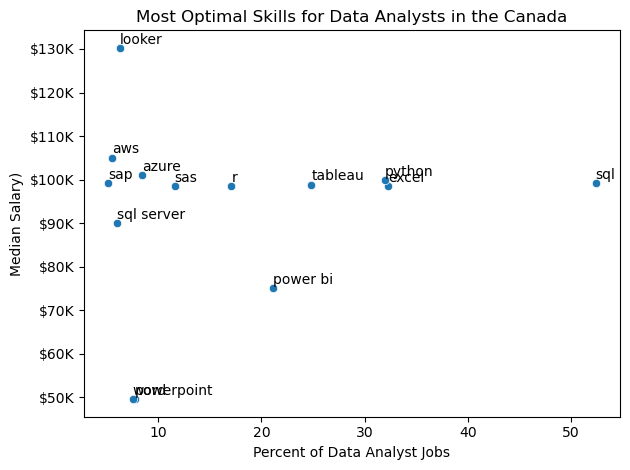

In [9]:
sns.scatterplot(data = df_skills, x = 'job_percent', y = 'median_salary')

for i, txt in enumerate(df_skills.index):
    plt.text(df_skills['job_percent'].iloc[i], df_skills['median_salary'].iloc[i]+1000, df_skills.index[i])

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the Canada')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

plt.tight_layout()
plt.show()

In [10]:
# pip install adjustText

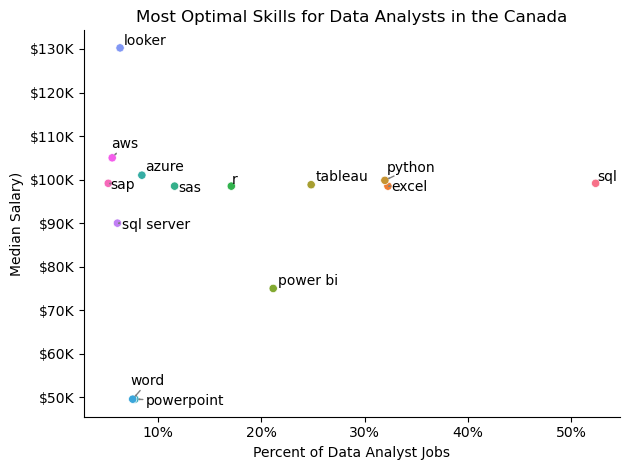

In [13]:
sns.scatterplot(data = df_skills, x = 'job_percent', y = 'median_salary', hue = df_skills.index)
sns.despine()


# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_skills.index):
    texts.append(plt.text(df_skills['job_percent'].iloc[i], df_skills['median_salary'].iloc[i], txt))

from adjustText import adjust_text

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the Canada')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.legend().remove()
plt.tight_layout()
plt.show()